<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bank-customer-churn-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2445309%2F4139805%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T155711Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dcdd6b8045adcc414b4fb3af514ce2fc226f3ede8af5f0603c4cd1d1b70c9bbc370dd7f546527128db7f528395aa556f98c1a839f8c2c3e8b35b0b9901756b33554b57f5ab2c3d35d2e676dd0ae0bed3d102220817a31747d8b203f42fa1cbc72287d5d41dca7c799a3e39ba5f74dd0c46a37b3962e1ba269aea212097e170908e34b198555865c65ebfdcb728c043a5995e80153549a28fec495ac60d92aef8a298ccb984d80cc9e6365bbf821dfaf3963583a176da4e68903c374dfecbf3e1f7c8c6eba6a66c5b9ea664c937330ed0027dec48efa285519ab01d27f67fe53a78e51ff79eceaa1a703ae58d4ce853053efcab493ae9133596be90128c49a3a25'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

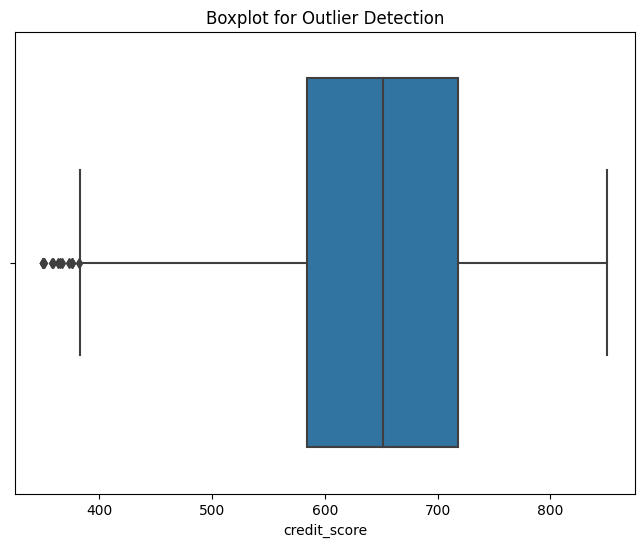

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
# Assuming the dataset has a header row
data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

# Extract a numerical column for boxplot visualization and outlier detection
column_name = 'credit_score'  # Replace with the name of your numerical column

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data[column_name])
plt.title('Boxplot for Outlier Detection')
plt.show()


In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
# Extract a numerical column for Z-score calculation and outlier detection
column_name = 'credit_score'  # Replace with the name of your numerical column

# Calculate Z-scores
z_scores = zscore(data[column_name])

# Define a threshold for outlier detection (adjust as needed)
threshold = 3

# Identify outliers based on Z-scores
outliers = np.abs(z_scores) > threshold

# Print the indices of detected outliers
outlier_indices = np.where(outliers)[0]
print("Indices of detected outliers:", outlier_indices)

# Print the values of detected outliers
print("Values of detected outliers:", data[column_name][outlier_indices])

Indices of detected outliers: [1405 1631 1838 1962 2473 8723 8762 9624]
Values of detected outliers: 1405    359
1631    350
1838    350
1962    358
2473    351
8723    350
8762    350
9624    350
Name: credit_score, dtype: int64


In [ ]:
column_name = 'credit_score'  # Replace with the name of your numerical column

# Calculate Interquartile Range (IQR)
Q1 = np.percentile(data[column_name], 25)
Q3 = np.percentile(data[column_name], 75)
IQR = Q3 - Q1

# Define a threshold for outlier detection (adjust as needed)
threshold = 1.5

# Identify outliers based on the IQR method
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

# Print the indices of detected outliers
outlier_indices = np.where(outliers)[0]
print("Indices of detected outliers:", outlier_indices)

Indices of detected outliers: [   7  942 1193 1405 1631 1838 1962 2473 2579 8154 8723 8762 9210 9356
 9624]


In [ ]:
print("Values of detected outliers:", data[column_name][outlier_indices])


Values of detected outliers: 7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: credit_score, dtype: int64


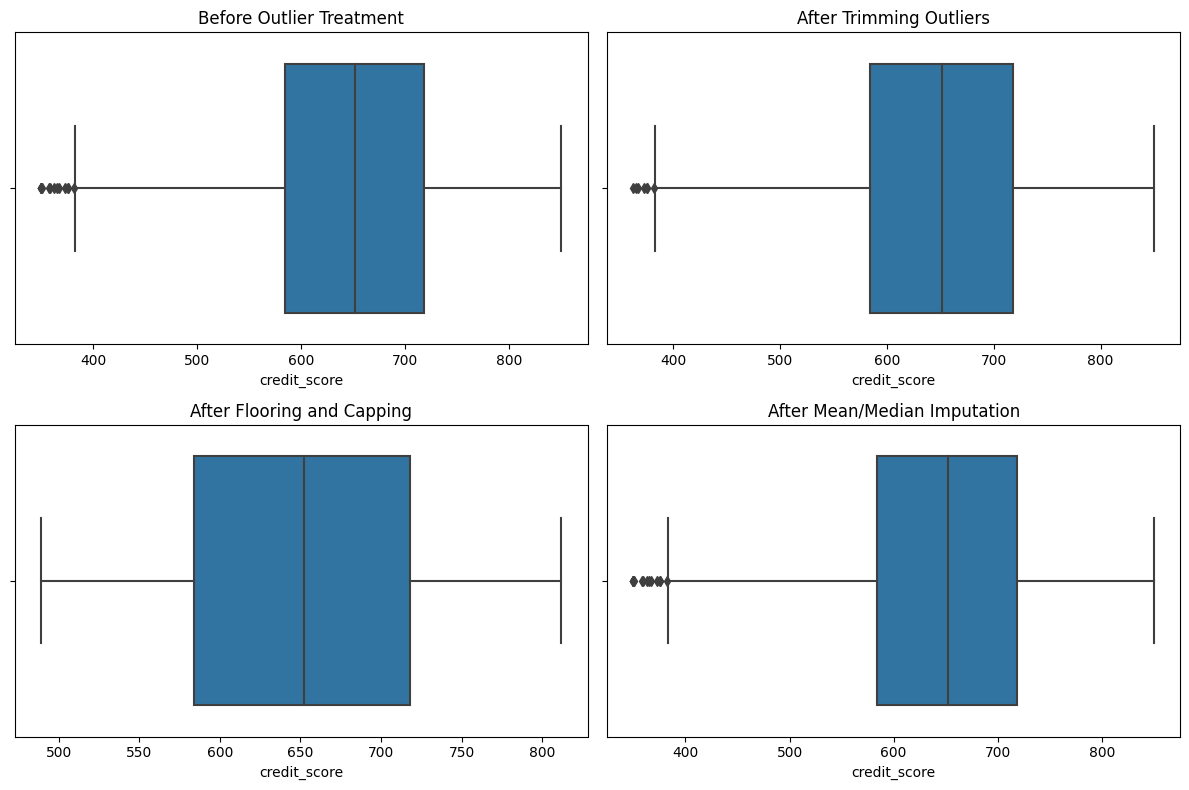

In [ ]:
# Step 1: Trimming/Remove outliers
# Calculate Z-scores
z_scores = zscore(data[column_name])

# Define a threshold for outlier detection (any Z-score outside of 3rd standard deviation)
z_threshold = 3

# Identify outliers based on Z-scores
outliers = np.abs(z_scores) > z_threshold

# Remove outliers
data_trimmed = data[~outliers]

# Step 2: Quantile-Based Flooring and Capping
# Set a range for quantile-based flooring and capping (adjust as needed)
floor_quantile = 0.05
cap_quantile = 0.95

floor_value = data[column_name].quantile(floor_quantile)
cap_value = data[column_name].quantile(cap_quantile)

# Flooring and capping
data_floor_cap = data.copy()
data_floor_cap[column_name] = np.clip(data_floor_cap[column_name], floor_value, cap_value)

# Step 3: Mean/Median Imputation
# Impute missing values (if any) with mean or median
imputation_value = data[column_name].median()  # Change to mean() if you prefer mean imputation
data_imputed = data.copy()
data_imputed[column_name] = data_imputed[column_name].fillna(imputation_value)

# Visualizing the Data before and after treating outliers
plt.figure(figsize=(12, 8))

# Before treatment
plt.subplot(2, 2, 1)
sns.boxplot(x=data[column_name])
plt.title('Before Outlier Treatment')

# After trimming
plt.subplot(2, 2, 2)
sns.boxplot(x=data_trimmed[column_name])
plt.title('After Trimming Outliers')

# After quantile-based flooring and capping
plt.subplot(2, 2, 3)
sns.boxplot(x=data_floor_cap[column_name])
plt.title('After Flooring and Capping')

# After mean/median imputation
plt.subplot(2, 2, 4)
sns.boxplot(x=data_imputed[column_name])
plt.title('After Mean/Median Imputation')

plt.tight_layout()
plt.show()